<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

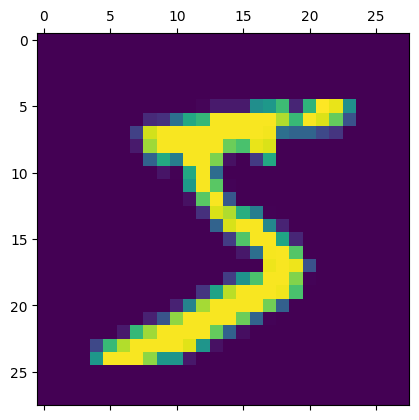

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 749us/step - accuracy: 0.8703 - loss: 0.4542
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.9614 - loss: 0.1321
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.9745 - loss: 0.0882
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.9806 - loss: 0.0665
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.9852 - loss: 0.0501


In [13]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [15]:
model.get_weights()

[array([[ 0.01736309,  0.01222698,  0.03788414, ..., -0.05785966,
         -0.04377536,  0.0611714 ],
        [ 0.01093372,  0.0416188 ,  0.0081531 , ...,  0.04795577,
         -0.01142155, -0.03839046],
        [ 0.03881078, -0.06063964,  0.0583518 , ..., -0.01887678,
          0.05148171, -0.05469289],
        ...,
        [ 0.036289  , -0.05733535,  0.05376881, ..., -0.06777781,
          0.06040008,  0.04317592],
        [-0.07699831,  0.07235886,  0.0353926 , ...,  0.01751722,
         -0.07883079,  0.07291743],
        [ 0.07624812, -0.06297777, -0.05590244, ..., -0.07757115,
          0.02029078,  0.07493223]], dtype=float32),
 array([ 3.84443812e-02,  4.48189378e-02,  3.95642519e-02,  1.12305172e-02,
         9.77831855e-02, -6.35947334e-03, -7.69884959e-02, -8.05204511e-02,
         3.05531528e-02,  1.68635771e-01, -3.61088775e-02, -3.88093777e-02,
        -4.32964861e-02,  5.25451228e-02, -7.53015652e-02, -1.75294038e-02,
        -7.79273920e-03,  3.02819931e-03, -9.56705585e